%md

# Simulating impact of peer review on supporting meritorious science


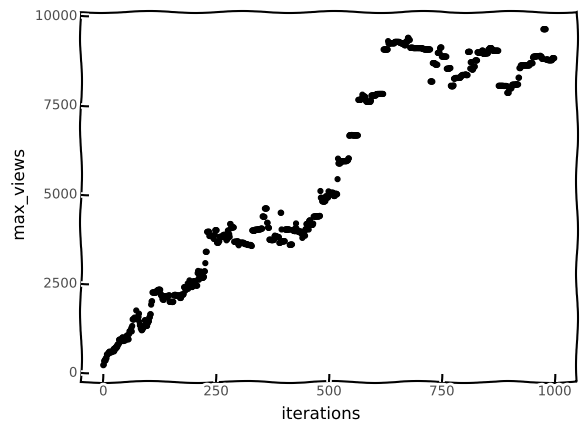

In [15]:
import numpy as np
import random
import ipywidgets as widgets
from IPython.display import display
import pandas as pd
import plotnine

#@widgets.interact_manual(lossRation=(0.0, 1.0, 0.1), winRatio=(0.0, 1.0, .01))
#def simulation(lossRatio=.17, winRatio=.2):
nonAwardRatio = .25
awardRatio = .2
nScientists = 1000
nDailyViews = 100000
nDays = 400
startViews = nDailyViews/nScientists
item2views = dict.fromkeys(range(nScientists), startViews)
iterations = []
max_views = []
for i in range(1000):
    for item in np.random.choice(range(nScientists), 1000):
        for otherItem in random.sample(range(nScientists), 1):
            viewers = min(item2views[item], item2views[otherItem])
            if np.random.binomial(1, .5) == 1:
                viewersExchanged = viewers * awardRatio
                item2views[item] += viewersExchanged
                item2views[otherItem] -= viewersExchanged
            else:
                viewersExchanged = viewers * nonAwardRatio
                item2views[item] -= viewersExchanged
                item2views[otherItem] += viewersExchanged
    iterations.append(i)
    max_views.append(max(item2views.values()))
df = pd.DataFrame()
df['iterations'] = iterations
df['max_views'] = max_views
plot = (
    plotnine.ggplot(data=df)
    + plotnine.aes(x='iterations', y='max_views')
    + plotnine.geom_point()
    + plotnine.theme_xkcd()
    )
print(plot)
    
    
#simulation()

In [54]:


print(sci)

[{}, {}, {}, {}, {}, {}, {}, {}, {}, {}]
0
[{}, {}, {}, {}, {}, {}, {}, {}, {}, {}]
1
[{'id': 0, 'reputation': 0.1, 'merit': 0.2}, {}, {}, {}, {}, {}, {}, {}, {}, {}]
2
[{'id': 0, 'reputation': 0.1, 'merit': 0.2}, {'id': 1, 'reputation': 0.1, 'merit': 0.1}, {}, {}, {}, {}, {}, {}, {}, {}]
3
[{'id': 0, 'reputation': 0.1, 'merit': 0.2}, {'id': 1, 'reputation': 0.1, 'merit': 0.1}, {'id': 2, 'reputation': 0.1, 'merit': 0.1}, {}, {}, {}, {}, {}, {}, {}]
4
[{'id': 0, 'reputation': 0.1, 'merit': 0.2}, {'id': 1, 'reputation': 0.1, 'merit': 0.1}, {'id': 2, 'reputation': 0.1, 'merit': 0.1}, {'id': 3, 'reputation': 0.1, 'merit': 0.1}, {}, {}, {}, {}, {}, {}]
5
[{'id': 0, 'reputation': 0.1, 'merit': 0.2}, {'id': 1, 'reputation': 0.1, 'merit': 0.1}, {'id': 2, 'reputation': 0.1, 'merit': 0.1}, {'id': 3, 'reputation': 0.1, 'merit': 0.1}, {'id': 4, 'reputation': 0.1, 'merit': 0.1}, {}, {}, {}, {}, {}]
6
[{'id': 0, 'reputation': 0.1, 'merit': 0.2}, {'id': 1, 'reputation': 0.1, 'merit': 0.1}, {'id': 2, 

[{}, {}, {}, {}, {}, {}, {}, {}, {}, {}]


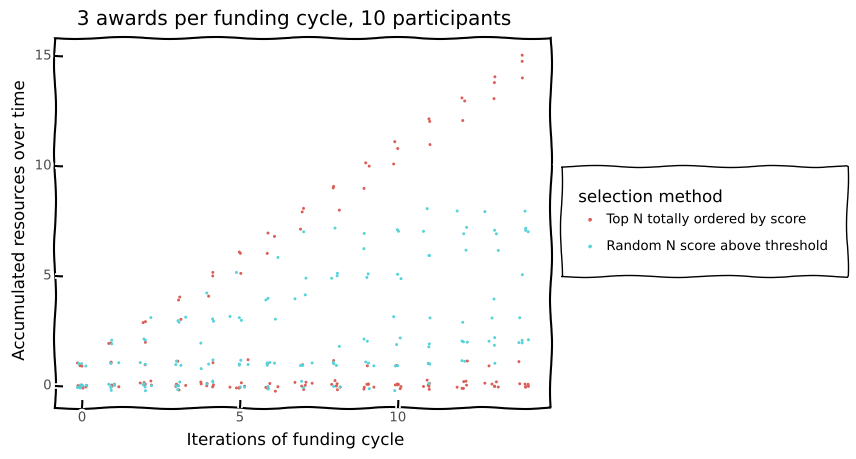

In [158]:
from numpy.random import default_rng
rng = default_rng()

nScientists = 10

sci = [{}] * nScientists
sci2 = [{}] * nScientists

for i in range(nScientists):
    sci[i] = {'id': i, 'reputation': .1, 'merit': .1, 'resources': 0}
    if i%10 == 0:
        sci[i]['merit'] += 0
    sci2[i] = {'id': i, 'reputation': .1, 'merit': .1, 'resources': 0}
    if i%10 == 0:
        sci2[i]['merit'] += 0
        
start = 0
nApplicants = nScientists
nRfp = 15
nFunded = 3
threshold = 0.2
sd_merit = 0.1
x = []
y = []
y2 = []

for rfp in range(0, nRfp):
    for i in range(0, nApplicants):
        sci[i]['score'] = rng.normal(sci[i]['merit'], sd_merit, 1)[0] +\
                                 sci[i]['reputation']
        sci2[i]['score'] = rng.normal(sci2[i]['merit'], sd_merit, 1)[0] +\
                                  sci2[i]['reputation']
    sorted_scores = sorted(sci, key=lambda s: s['score'], reverse=True)
    for winner in sorted_scores[0:nFunded]:
        winner['reputation'] += .1
        winner['resources'] += 1

    candidates = [s for s in sci2 if s['score'] > threshold]
    for winner in random.sample(candidates, nFunded):
        winner['reputation'] += .1
        winner['resources'] += 1

    jitter = .1
    for i in range(0, nScientists):
        x.append(rng.normal(rfp, jitter, 1)[0])
        y.append(rng.normal(sci[i]['resources'], jitter, 1)[0])
        y2.append(rng.normal(sci2[i]['resources'], jitter, 1)[0])

df = pd.DataFrame()
df2 = pd.DataFrame()
df['resources'] = y
df2['resources'] = y2
df['rfp_count'] = x
df2['rfp_count'] = x
df['selection method'] = ['Top N totally ordered by score'] * len(x)
df2['selection method'] = ['Random N score above threshold'] * len(x)


plot = (
    plotnine.ggplot(mapping=plotnine.aes(x='rfp_count', y='resources', group = 'selection method'))
    + plotnine.geom_point(data=df, mapping=plotnine.aes(color='selection method'), size=.2) 
    + plotnine.geom_point(data=df2, mapping=plotnine.aes(color='selection method'), size=.2)
    + plotnine.ggtitle(f"{nFunded} awards per funding cycle, {nApplicants} participants")
    + plotnine.labs(x="Iterations of funding cycle", y="Accumulated resources over time")
    + plotnine.theme_xkcd()
    )

print(plot)
            
#print(sci)





In [125]:
sci2


[{'id': 0,
  'reputation': 0.1,
  'merit': 0.1,
  'resources': 0,
  'score': -0.12187839485295399},
 {'id': 1,
  'reputation': 0.2,
  'merit': 0.1,
  'resources': 1,
  'score': 0.19056482441865952},
 {'id': 2,
  'reputation': 0.1,
  'merit': 0.1,
  'resources': 0,
  'score': 0.1789504028028247},
 {'id': 3,
  'reputation': 0.2,
  'merit': 0.1,
  'resources': 1,
  'score': 0.14821820357451607},
 {'id': 4,
  'reputation': 0.1,
  'merit': 0.1,
  'resources': 0,
  'score': 0.18376492733738772},
 {'id': 5,
  'reputation': 0.1,
  'merit': 0.1,
  'resources': 0,
  'score': 0.11287399715969787},
 {'id': 6,
  'reputation': 0.1,
  'merit': 0.1,
  'resources': 0,
  'score': 0.08386213148766808},
 {'id': 7,
  'reputation': 0.1,
  'merit': 0.1,
  'resources': 0,
  'score': -0.08358944164223348},
 {'id': 8,
  'reputation': 0.2,
  'merit': 0.1,
  'resources': 1,
  'score': 0.01585832792020639},
 {'id': 9,
  'reputation': 0.1,
  'merit': 0.1,
  'resources': 0,
  'score': -0.12517804897206114}]

In [94]:
li = []
li.append('a')
li

['a']